Je prends MNIST
Je prends 100 images labellisé et le reste pas labelllisé
Je dev un model pour faire la classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import MNIST
from torchvision import transforms, datasets
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import tqdm


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset_100 = [[], []]

flag = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(train_dataset)):
    if train_dataset.targets[i] == 0 and flag[0] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[0] += 1
    if train_dataset.targets[i] == 1 and flag[1] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[1] += 1
    if train_dataset.targets[i] == 2 and flag[2] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[2] += 1
    if train_dataset.targets[i] == 3 and flag[3] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[3] += 1
    if train_dataset.targets[i] == 4 and flag[4] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[4] += 1
    if train_dataset.targets[i] == 5 and flag[5] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[5] += 1
    if train_dataset.targets[i] == 6 and flag[6] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[6] += 1
    if train_dataset.targets[i] == 7 and flag[7] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[7] += 1
    if train_dataset.targets[i] == 8 and flag[8] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[8] += 1
    if train_dataset.targets[i] == 9 and flag[9] < 10:
        train_dataset_100[0].append(train_dataset.data[i])
        train_dataset_100[1].append(train_dataset.targets[i])
        flag[9] += 1

train_labels_100 = train_dataset_100[1]
train_data_100 = train_dataset_100[0]

In [2]:
# Definition du CNN

class CNN_MLP(nn.Module):
    def __init__(self):
        super(CNN_MLP, self).__init__()
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [22]:

batch_size = 5
train_loader = DataLoader(train_data_100, batch_size=batch_size, shuffle=True)
model = CNN_MLP()


AttributeError: 'DataLoader' object has no attribute 'shape'

In [3]:
#CNN avec les modifs

batch_size = 5
train_loader = DataLoader(train_data_100, batch_size=batch_size, shuffle=True)
model = CNN_MLP()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 5
for epoch in range(epochs):
    model.train()
    loss_t = 0

    for batch_idx, (data, target) in tqdm.tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()

    print(f'Train Epoch: {epoch+1}/{epochs}\tLoss: {loss_t:.6f}')
    model.eval()


0it [00:00, ?it/s]


ValueError: too many values to unpack (expected 2)

In [163]:
offset = []
tabZero = []
for y in range(28):
    tabZero.append(0)
for i in range(5):
    offset.append(tabZero)



In [142]:
# train_data_100[num image][y][x]

len(train_data_100[27][27])
img_test = train_data_100[15]
img_test[7]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 115, 121, 162, 253, 253, 213,   0,   0,   0,   0,   0,   0,   0],
       dtype=torch.uint8)

7


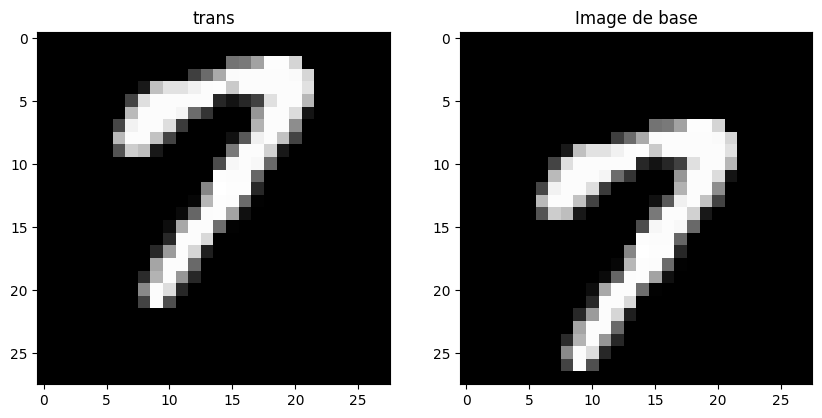

In [164]:
ind = 15

img_support = train_data_100[ind].detach().clone()

for z in range(23):
    img_support[z] = img_support[z+5]

for y in range(22, 27):
    img_support[y] = torch.tensor(tabZero, dtype=torch.uint8)

img = train_data_100[ind].detach().clone()


label = int(train_labels_100[ind])
print(label)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_support, cmap='gray')
axes[0].axis('on')
axes[0].set_title('trans')

axes[1].imshow(img, cmap='gray')
axes[1].axis('on')
axes[1].set_title('Image de base')

plt.show()


